In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
data=pd.read_excel('review_sixths_copy1.xlsx')
data

,Cohort,College,Degree,Graduation_Status,JobLocation,Salary,Volunteering,Internship_experience,Gender,Country_of_Origin,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,2022,College of Health Professions,Doctorate,Employed full time (on average 30+ hours per w...,Charleston OH,65500,Yes,Yes,Male,United States of America,NaN,NaN,NaN
1,2022,College of Health Professions,Doctorate,Employed full time (on average 30+ hours per w...,Oxford MI,85500,NaN,Yes,NaN,NaN,NaN,NaN,NaN
2,2022,College of Health Professions,Doctorate,Employed full time (on average 30+ hours per w...,Dayton OH,75500,NaN,Yes,NaN,NaN,NaN,NaN,NaN
3,2022,College of Health Professions,Bachelor of Science,Employed full time (on average 30+ hours per w...,Fort Wayne IN,65500,NaN,Yes,NaN,NaN,NaN,NaN,NaN
4,2022,College of Health Professions,Doctorate,Employed full time (on average 30+ hours per w...,"Marion, IL",95500,NaN,Yes,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,2023,College of Pharmacy,Doctorate,Employed Full Time,"Westerville, Ohio, USA",85500,Yes,Yes,NaN,NaN,NaN,NaN,NaN
693,2023,College of Health Professions,Master,Employed Full Time,"Findlay, Ohio, United States",75500,No,No,Male,United States of America,NaN,NaN,NaN
694,2023,College of Sciences,Master,Employed Full Time,"Edison, New Jersey",75500,No,No,NaN,NaN,NaN,NaN,NaN
695,2023,College of Education,Master,Employed Full Time,"Greenville, Ohio US",45500,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
data.drop(columns=['Graduation_Status'],inplace=True)

## Data Mining / Cleaning 

### Fixing column name issue for college 

In [141]:
Replacement_college={
    'College of Arts, Humanities & Social Sciences':'College of Arts, Humanities, and Social Services',

      
}
data['College']=data['College'].replace(Replacement_college)

data['College'].value_counts()

College of Sciences                                 198
College of Health Professions                       166
College of Business                                 133
College of Education                                106
College of Pharmacy                                  52
College of Arts, Humanities, and Social Services     42
Name: College, dtype: int64

### Using One-Hot Encoder Data preprocessing technique

In [142]:
from sklearn.preprocessing import OneHotEncoder



encoder = OneHotEncoder(sparse=False, drop='first')  
college_encoded = encoder.fit_transform(data[['College']])


columns = encoder.get_feature_names_out(['College'])  
college_encoded_df = pd.DataFrame(college_encoded, columns=columns)

data.reset_index(drop=True, inplace=True)

data = pd.concat([data.drop('College', axis=1), college_encoded_df], axis=1)



In [143]:
data['Degree'].value_counts()

Bachelor                                                            122
BS                                                                   97
Doctorate                                                            89
Master                                                               78
Bachelor of Science                                                  74
MBA                                                                  29
PHRD                                                                 23
DPT                                                                  20
MAE                                                                  19
MSEH                                                                 16
Master of Business Administration                                    12
Master of Arts                                                       12
EDD                                                                  11
BA                                                              

In [144]:
replacement_dict = {
    'PHRD': 'Doctorate',
    'DPT': 'Doctorate',
    'BA':'Bachelor',
    'MOT':'Master',
    'MBA':'Master',
    'MAE':'Master',
    'Bachelor of Arts':'Bachelor',
    'MSEH':'Master',
    'Master of Arts':'Master',
    'MSHI':'Master',
    'BSN':'Bachelor',
    'EDD':'Doctorate',
    'Master of Occupational Therapy':'Master',
    'MSAS':'Master',
    'BSBM': 'Bachelor',
    'MPAS': 'Master',
    'Master of Business Administration': 'Master',
    'AA': 'Associate',
    'Bachelor of Science': 'Bachelor',
    'BS': 'Bachelor',
    'MARW':'Master',
    'MATB':'Master',
    'Master of Science in Environmental, Safety and Health Management':'Master',
    'Master of Science':'Master',
    'Associate':'Associate',
    'Associate of Arts':'Associate',
    'MTRN':'Master',
    'Master of Physician Assistant':'Master',
    'MAPC':'Master',
    'Certificate':'Doctorate',
    
}

data['Degree'] = data['Degree'].replace(replacement_dict)

data['Degree'].value_counts()

Bachelor     332
Master       216
Doctorate    144
Associate      5
Name: Degree, dtype: int64

In [145]:
Replacement_Degree={
    'Associate' : 1,
    'Bachelor':2,
    'Master':3,
    'Doctorate' : 4
      
}
data['Degree_Encoded']=data['Degree'].replace(Replacement_Degree)
data['Degree_Encoded'] = data['Degree_Encoded'].astype('category')
data['Degree_Encoded'].value_counts()



2    332
3    216
4    144
1      5
Name: Degree_Encoded, dtype: int64

In [146]:
data['Degree_Encoded'].value_counts()

2    332
3    216
4    144
1      5
Name: Degree_Encoded, dtype: int64

In [147]:
data['Country_of_Origin'].isnull().sum()

308

In [148]:
data['Country_of_Origin'].value_counts()

United States of America    377
India                         5
Germany                       3
Saudi Arabia                  2
Puerto Rico                   1
0                             1
Name: Country_of_Origin, dtype: int64

In [149]:
data['Salary'].value_counts()

20000     68
35500     60
45500     57
65500     48
55500     44
          ..
18000      1
54000      1
23000      1
79040      1
155500     1
Name: Salary, Length: 138, dtype: int64

In [150]:
data['Country_of_Origin'].value_counts()

United States of America    377
India                         5
Germany                       3
Saudi Arabia                  2
Puerto Rico                   1
0                             1
Name: Country_of_Origin, dtype: int64

In [151]:
data.drop(columns=['Degree'], inplace=True)

In [152]:
conditions = [
    data['JobLocation'].str.contains('oh', case=False, na=False),  # Contains 'oh'
    
    data['JobLocation'].isna() | (data['JobLocation'] == '')  # Is N/A or blank
]

choices = [
    1,  # Set to 1 if 'oh' is found
    0   # Set to 0 if blank or N/A
]

data['JobLocation_Encoded'] = np.select(conditions, choices)

In [153]:
data['JobLocation_Encoded'].value_counts()

1    459
0    238
Name: JobLocation_Encoded, dtype: int64

In [154]:
data.drop(columns=['JobLocation'],inplace=True)

In [155]:

data['Salary'] = data['Salary'].replace({'\$': '', ',': '', ' ': ''}, regex=True)
data['Salary'] = pd.to_numeric(data['Salary'], errors='coerce')
data['Salary']

0      65500.0
1      85500.0
2      75500.0
3      65500.0
4      95500.0
        ...   
692    85500.0
693    75500.0
694    75500.0
695    45500.0
696    35500.0
Name: Salary, Length: 697, dtype: float64

In [156]:
target_salary = 70000
data['Salary'] = data['Salary'].apply(lambda x: 1 if x >= target_salary else 0)


data['Salary'].value_counts()


0    517
1    180
Name: Salary, dtype: int64

In [157]:
data.drop(columns=['Unnamed: 10','Unnamed: 11','Unnamed: 12'],inplace=True)

In [158]:
data

,Cohort,Salary,Volunteering,Internship_experience,Gender,Country_of_Origin,College_College of Business,College_College of Education,College_College of Health Professions,College_College of Pharmacy,College_College of Sciences,Degree_Encoded,JobLocation_Encoded
0,2022,0,Yes,Yes,Male,United States of America,0.0,0.0,1.0,0.0,0.0,4,1
1,2022,1,NaN,Yes,NaN,NaN,0.0,0.0,1.0,0.0,0.0,4,0
2,2022,1,NaN,Yes,NaN,NaN,0.0,0.0,1.0,0.0,0.0,4,1
3,2022,0,NaN,Yes,NaN,NaN,0.0,0.0,1.0,0.0,0.0,2,0
4,2022,1,NaN,Yes,NaN,NaN,0.0,0.0,1.0,0.0,0.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,2023,1,Yes,Yes,NaN,NaN,0.0,0.0,0.0,1.0,0.0,4,1
693,2023,1,No,No,Male,United States of America,0.0,0.0,1.0,0.0,0.0,3,1
694,2023,1,No,No,NaN,NaN,0.0,0.0,0.0,0.0,1.0,3,0
695,2023,0,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,3,1


In [159]:
data.isnull().sum()

Cohort                                     0
Salary                                     0
Volunteering                             422
Internship_experience                    284
Gender                                   303
Country_of_Origin                        308
College_College of Business                0
College_College of Education               0
College_College of Health Professions      0
College_College of Pharmacy                0
College_College of Sciences                0
Degree_Encoded                             0
JobLocation_Encoded                        0
dtype: int64

In [160]:
data.drop(columns=['Volunteering'],inplace=True)

In [161]:
data.isnull().sum()

Cohort                                     0
Salary                                     0
Internship_experience                    284
Gender                                   303
Country_of_Origin                        308
College_College of Business                0
College_College of Education               0
College_College of Health Professions      0
College_College of Pharmacy                0
College_College of Sciences                0
Degree_Encoded                             0
JobLocation_Encoded                        0
dtype: int64

In [162]:
data

,Cohort,Salary,Internship_experience,Gender,Country_of_Origin,College_College of Business,College_College of Education,College_College of Health Professions,College_College of Pharmacy,College_College of Sciences,Degree_Encoded,JobLocation_Encoded
0,2022,0,Yes,Male,United States of America,0.0,0.0,1.0,0.0,0.0,4,1
1,2022,1,Yes,NaN,NaN,0.0,0.0,1.0,0.0,0.0,4,0
2,2022,1,Yes,NaN,NaN,0.0,0.0,1.0,0.0,0.0,4,1
3,2022,0,Yes,NaN,NaN,0.0,0.0,1.0,0.0,0.0,2,0
4,2022,1,Yes,NaN,NaN,0.0,0.0,1.0,0.0,0.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
692,2023,1,Yes,NaN,NaN,0.0,0.0,0.0,1.0,0.0,4,1
693,2023,1,No,Male,United States of America,0.0,0.0,1.0,0.0,0.0,3,1
694,2023,1,No,NaN,NaN,0.0,0.0,0.0,0.0,1.0,3,0
695,2023,0,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,3,1


In [163]:
data=data.dropna()
data.isnull().sum()

Cohort                                   0
Salary                                   0
Internship_experience                    0
Gender                                   0
Country_of_Origin                        0
College_College of Business              0
College_College of Education             0
College_College of Health Professions    0
College_College of Pharmacy              0
College_College of Sciences              0
Degree_Encoded                           0
JobLocation_Encoded                      0
dtype: int64

In [164]:
data

,Cohort,Salary,Internship_experience,Gender,Country_of_Origin,College_College of Business,College_College of Education,College_College of Health Professions,College_College of Pharmacy,College_College of Sciences,Degree_Encoded,JobLocation_Encoded
0,2022,0,Yes,Male,United States of America,0.0,0.0,1.0,0.0,0.0,4,1
6,2022,1,Yes,Female,United States of America,0.0,0.0,1.0,0.0,0.0,3,1
7,2022,1,Yes,Female,United States of America,0.0,0.0,1.0,0.0,0.0,2,1
8,2022,0,Yes,Female,United States of America,1.0,0.0,0.0,0.0,0.0,2,1
11,2022,1,Yes,Male,United States of America,0.0,0.0,1.0,0.0,0.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
684,2023,0,Yes,Male,India,0.0,0.0,1.0,0.0,0.0,3,0
685,2023,0,Yes,Female,United States of America,0.0,0.0,1.0,0.0,0.0,3,0
686,2023,1,Yes,Female,United States of America,0.0,0.0,1.0,0.0,0.0,3,0
687,2023,0,Yes,Female,United States of America,0.0,0.0,1.0,0.0,0.0,2,1


In [ ]:
#data.to_excel('review_sixths_copy2.xlsx', index=False)

In [165]:
data['Country_of_Origin'].isnull().sum()

0

In [166]:
data['Country_of_Origin']=data['Country_of_Origin'].apply(lambda x:1 if x=='United States of America' or x==1 else 0)
data['Country_of_Origin'] = data['Country_of_Origin'].astype(int)

data['Country_of_Origin'].value_counts()

C:\Users\Mahyar\AppData\Local\Temp\ipykernel_6156\2302388000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Country_of_Origin']=data['Country_of_Origin'].apply(lambda x:1 if x=='United States of America' or x==1 else 0)
C:\Users\Mahyar\AppData\Local\Temp\ipykernel_6156\2302388000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Country_of_Origin'] = data['Country_of_Origin'].astype(int)


1    227
0      5
Name: Country_of_Origin, dtype: int64

In [167]:
from sklearn.preprocessing import LabelEncoder
data['Gender_Encoded'] = data['Gender'].apply(lambda x: 1 if x == 'Male' else 0 if x=='Female' else 'N/A')

C:\Users\Mahyar\AppData\Local\Temp\ipykernel_6156\3507581128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender_Encoded'] = data['Gender'].apply(lambda x: 1 if x == 'Male' else 0 if x=='Female' else 'N/A')


In [168]:
data['Gender_Encoded'].value_counts()

0    171
1     61
Name: Gender_Encoded, dtype: int64

In [169]:
data.drop(columns=['Gender'],inplace=True)

C:\Users\Mahyar\AppData\Local\Temp\ipykernel_6156\4224620232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Gender'],inplace=True)


In [170]:

data['Internship_experience'] = data['Internship_experience'].apply(lambda x: 1 if x == 'Yes' else 0)

C:\Users\Mahyar\AppData\Local\Temp\ipykernel_6156\4187014196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Internship_experience'] = data['Internship_experience'].apply(lambda x: 1 if x == 'Yes' else 0)


In [171]:
data['Internship_experience'].value_counts()

1    208
0     24
Name: Internship_experience, dtype: int64

In [172]:
data


,Cohort,Salary,Internship_experience,Country_of_Origin,College_College of Business,College_College of Education,College_College of Health Professions,College_College of Pharmacy,College_College of Sciences,Degree_Encoded,JobLocation_Encoded,Gender_Encoded
0,2022,0,1,1,0.0,0.0,1.0,0.0,0.0,4,1,1
6,2022,1,1,1,0.0,0.0,1.0,0.0,0.0,3,1,0
7,2022,1,1,1,0.0,0.0,1.0,0.0,0.0,2,1,0
8,2022,0,1,1,1.0,0.0,0.0,0.0,0.0,2,1,0
11,2022,1,1,1,0.0,0.0,1.0,0.0,0.0,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
684,2023,0,1,0,0.0,0.0,1.0,0.0,0.0,3,0,1
685,2023,0,1,1,0.0,0.0,1.0,0.0,0.0,3,0,0
686,2023,1,1,1,0.0,0.0,1.0,0.0,0.0,3,0,0
687,2023,0,1,1,0.0,0.0,1.0,0.0,0.0,2,1,0


In [173]:
data.isnull().sum()

Cohort                                   0
Salary                                   0
Internship_experience                    0
Country_of_Origin                        0
College_College of Business              0
College_College of Education             0
College_College of Health Professions    0
College_College of Pharmacy              0
College_College of Sciences              0
Degree_Encoded                           0
JobLocation_Encoded                      0
Gender_Encoded                           0
dtype: int64

In [71]:
#data.to_excel('review_sixths_copy3.xlsx', index=False)

In [174]:
data

,Cohort,Salary,Internship_experience,Country_of_Origin,College_College of Business,College_College of Education,College_College of Health Professions,College_College of Pharmacy,College_College of Sciences,Degree_Encoded,JobLocation_Encoded,Gender_Encoded
0,2022,0,1,1,0.0,0.0,1.0,0.0,0.0,4,1,1
6,2022,1,1,1,0.0,0.0,1.0,0.0,0.0,3,1,0
7,2022,1,1,1,0.0,0.0,1.0,0.0,0.0,2,1,0
8,2022,0,1,1,1.0,0.0,0.0,0.0,0.0,2,1,0
11,2022,1,1,1,0.0,0.0,1.0,0.0,0.0,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
684,2023,0,1,0,0.0,0.0,1.0,0.0,0.0,3,0,1
685,2023,0,1,1,0.0,0.0,1.0,0.0,0.0,3,0,0
686,2023,1,1,1,0.0,0.0,1.0,0.0,0.0,3,0,0
687,2023,0,1,1,0.0,0.0,1.0,0.0,0.0,2,1,0


# Model Building and Evaluation


# Logist Regression Model, Using Cross-validation

In [175]:
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


X = data.drop('Salary', axis=1)
Y = data['Salary']
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the K-fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a pipeline that standardizes the data then applies logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(C= 1, solver= 'lbfgs', random_state=42, max_iter=2000, class_weight= None))

# Perform K-fold cross-validation and calculate accuracies
scores = cross_val_score(pipeline, X, Y, scoring='accuracy', cv=kf)

# Print the accuracy for each fold
for i, score in enumerate(scores, 1):
    print(f"Fold {i}: Accuracy = {score:.4f}")

# Print the average accuracy over all folds
print(f"\nAverage Accuracy: {np.mean(scores):.4f}")


Fold 1: Accuracy = 0.8298
Fold 2: Accuracy = 0.6383
Fold 3: Accuracy = 0.7609
Fold 4: Accuracy = 0.6957
Fold 5: Accuracy = 0.8043

Average Accuracy: 0.7458


## Calculating Performance Metrics

In [176]:
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix

X = data.drop('Salary', axis=1)
Y = data['Salary']
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the K-fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a pipeline that standardizes the data then applies logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(C= 1, solver= 'lbfgs', random_state=42, max_iter=2000, class_weight= None))

# Custom scorer for specificity
def specificity_score(y_true, y_pred):
    tn, fp, _, _ = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp) if (tn + fp) > 0 else 0

specificity_scorer = make_scorer(specificity_score)

# Define the scoring metrics, including the custom specificity scorer
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc',
    'specificity': specificity_scorer
}

# Perform K-fold cross-validation and calculating the specified metrics
scores = cross_validate(pipeline, X_train_val, Y_train_val, scoring=scoring, cv=kf, return_train_score=False)

# Print the metrics for each fold and the average
for metric in scoring.keys():
    metric_scores = scores[f'test_{metric}']
    for fold_index, score in enumerate(metric_scores, 1):
        print(f"Fold {fold_index}: {metric.capitalize()} = {score:.4f}")
    print(f"\nAverage {metric.capitalize()}: {np.mean(metric_scores):.4f}\n")

Fold 1: Accuracy = 0.7027
Fold 2: Accuracy = 0.7568
Fold 3: Accuracy = 0.5946
Fold 4: Accuracy = 0.5946
Fold 5: Accuracy = 0.7568

Average Accuracy: 0.6811

Fold 1: Precision = 0.5556
Fold 2: Precision = 0.6000
Fold 3: Precision = 0.2857
Fold 4: Precision = 0.5000
Fold 5: Precision = 0.5714

Average Precision: 0.5025

Fold 1: Recall = 0.4167
Fold 2: Recall = 0.3000
Fold 3: Recall = 0.4444
Fold 4: Recall = 0.1333
Fold 5: Recall = 0.4000

Average Recall: 0.3389

Fold 1: F1 = 0.4762
Fold 2: F1 = 0.4000
Fold 3: F1 = 0.3478
Fold 4: F1 = 0.2105
Fold 5: F1 = 0.4706

Average F1: 0.3810

Fold 1: Roc_auc = 0.6483
Fold 2: Roc_auc = 0.7222
Fold 3: Roc_auc = 0.7183
Fold 4: Roc_auc = 0.7773
Fold 5: Roc_auc = 0.6611

Average Roc_auc: 0.7054

Fold 1: Specificity = 0.8400
Fold 2: Specificity = 0.9259
Fold 3: Specificity = 0.6429
Fold 4: Specificity = 0.9091
Fold 5: Specificity = 0.8889

Average Specificity: 0.8414



## Calculating Confusion Matrix

In [177]:

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline


X = data.drop('Salary', axis=1)
Y = data['Salary']

# Split the data into a training+validation set (80%) and a separate test set (20%)
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the K-fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a pipeline that standardizes the data then applies logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(C=1, solver='lbfgs', random_state=42, max_iter=2000))

# Placeholder for confusion matrices
conf_matrices = []

for train_index, val_index in kf.split(X_train_val):
    # Split the data into training and validation for the current fold
    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    Y_train, Y_val = Y_train_val.iloc[train_index], Y_train_val.iloc[val_index]
    
    # Fit the model on the training data
    pipeline.fit(X_train, Y_train)
    
    # Predict on the validation data
    Y_pred = pipeline.predict(X_val)
    
    # Compute and store the confusion matrix for the current fold
    conf_matrix = confusion_matrix(Y_val, Y_pred)
    conf_matrices.append(conf_matrix)

# Print the confusion matrix for each fold
for i, matrix in enumerate(conf_matrices, 1):
    print(f"Fold {i} Confusion Matrix:\n{matrix}\n")

# This assumes that the class labels are consistent across folds.
if conf_matrices:
    avg_conf_matrix = np.mean(conf_matrices, axis=0).astype(int)
    print(f"Average Confusion Matrix:\n{avg_conf_matrix}")


Fold 1 Confusion Matrix:
[[21  4]
 [ 7  5]]

Fold 2 Confusion Matrix:
[[25  2]
 [ 7  3]]

Fold 3 Confusion Matrix:
[[18 10]
 [ 5  4]]

Fold 4 Confusion Matrix:
[[20  2]
 [13  2]]

Fold 5 Confusion Matrix:
[[24  3]
 [ 6  4]]

Average Confusion Matrix:
[[21  4]
 [ 7  3]]


In [178]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Splitting the dataset into a training+validation set and a test set
# Assuming want to reserve 20% of the data for the test set
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Fit the model on the entire training+validation set
pipeline.fit(X_train_val, Y_train_val)

# Predict on the test set
Y_test_pred = pipeline.predict(X_test)

# Calculate and print the accuracy on the test set
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")


Test Set Accuracy: 0.7000


## Decision Tree Model

In [51]:

from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


X = data.drop('Salary', axis=1)
Y = data['Salary']
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the K-fold cross-validator
kf_dt = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a pipeline (though Decision Trees don't require scaling, it's included for consistency)
pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=4, min_samples_split=6, random_state=42))

# Perform K-fold cross-validation and calculate accuracies
scores = cross_val_score(pipeline, X, Y, scoring='accuracy', cv=kf)

# Print the accuracy for each fold
for i, score in enumerate(scores, 1):
    print(f"Fold {i}: Accuracy = {score:.4f}")

# Print the average accuracy for all folds
print(f"\n Decision Tree Average Accuracy: {np.mean(scores):.4f}")


Fold 1: Accuracy = 0.8298
Fold 2: Accuracy = 0.7660
Fold 3: Accuracy = 0.7609
Fold 4: Accuracy = 0.7826
Fold 5: Accuracy = 0.7609

 Decision Tree Average Accuracy: 0.7800


### Calculating Performance Metrics for Decision Tree Model

In [52]:

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, confusion_matrix


X = data.drop('Salary', axis=1)
Y = data['Salary']
X_train_val, X_test_dt, Y_train_val, Y_test_dt = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the K-fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a pipeline (though Decision Trees don't generally require scaling, it's included for consistency)
pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=4, min_samples_split=6, random_state=42))

# Custom scorer for specificity
def specificity_score(y_true, y_pred):
    tn, fp, _, _ = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp) if (tn + fp) > 0 else 0

specificity_scorer = make_scorer(specificity_score)

# Define the metrics to be calculated, including the custom specificity scorer
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc',
    'specificity': specificity_scorer
}

# Perform K-fold cross-validation and calculate the specified metrics
scores = cross_validate(pipeline, X_train_val, Y_train_val, scoring=scoring, cv=kf, return_train_score=False)

# Print the metrics for each fold and the average
for metric in scoring.keys():
    metric_scores = scores[f'test_{metric}']
    for fold_index, score in enumerate(metric_scores, 1):
        print(f"Fold {fold_index}: {metric.capitalize()} = {score:.4f}")
    print(f"\nAverage {metric.capitalize()}: {np.mean(metric_scores):.4f}\n")


Fold 1: Accuracy = 0.7027
Fold 2: Accuracy = 0.7297
Fold 3: Accuracy = 0.8108
Fold 4: Accuracy = 0.7027
Fold 5: Accuracy = 0.8649

Average Accuracy: 0.7622

Fold 1: Precision = 0.5455
Fold 2: Precision = 0.5000
Fold 3: Precision = 0.5714
Fold 4: Precision = 0.8333
Fold 5: Precision = 0.8571

Average Precision: 0.6615

Fold 1: Recall = 0.5000
Fold 2: Recall = 0.5000
Fold 3: Recall = 0.8889
Fold 4: Recall = 0.3333
Fold 5: Recall = 0.6000

Average Recall: 0.5644

Fold 1: F1 = 0.5217
Fold 2: F1 = 0.5000
Fold 3: F1 = 0.6957
Fold 4: F1 = 0.4762
Fold 5: F1 = 0.7059

Average F1: 0.5799

Fold 1: Roc_auc = 0.7600
Fold 2: Roc_auc = 0.6611
Fold 3: Roc_auc = 0.8591
Fold 4: Roc_auc = 0.8030
Fold 5: Roc_auc = 0.8241

Average Roc_auc: 0.7815

Fold 1: Specificity = 0.8000
Fold 2: Specificity = 0.8148
Fold 3: Specificity = 0.7857
Fold 4: Specificity = 0.9545
Fold 5: Specificity = 0.9630

Average Specificity: 0.8636



### Confusion Matrix for Decision Tree

In [53]:

from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


X = data.drop('Salary', axis=1)
Y = data['Salary']

# Split the data into a training+validation set (80%) and a separate test set (20%)
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the K-fold cross-validator for the training+validation set
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the Decision Tree model with specified hyperparameters
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=4, min_samples_split=6, random_state=42)

# Placeholder for confusion matrices
conf_matrices = []

for train_index, val_index in kf.split(X_train_val):
    # Split the data into training and validation for the current fold
    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    Y_train, Y_val = Y_train_val.iloc[train_index], Y_train_val.iloc[val_index]
    
    # Fit the model on the training data
    decision_tree.fit(X_train, Y_train)
    
    # Predict on the validation data
    Y_pred = decision_tree.predict(X_val)
    
    # Compute and store the confusion matrix for the current fold
    conf_matrix = confusion_matrix(Y_val, Y_pred)
    conf_matrices.append(conf_matrix)

# Print the confusion matrix for each fold
for i, matrix in enumerate(conf_matrices, 1):
    print(f"Fold {i} Confusion Matrix:\n{matrix}\n")

# This assumes that the class labels are consistent across folds.
if conf_matrices:
    avg_conf_matrix = np.mean(conf_matrices, axis=0).astype(int)
    print(f"Average Confusion Matrix:\n{avg_conf_matrix}")


Fold 1 Confusion Matrix:
[[20  5]
 [ 6  6]]

Fold 2 Confusion Matrix:
[[22  5]
 [ 5  5]]

Fold 3 Confusion Matrix:
[[22  6]
 [ 1  8]]

Fold 4 Confusion Matrix:
[[21  1]
 [10  5]]

Fold 5 Confusion Matrix:
[[26  1]
 [ 4  6]]

Average Confusion Matrix:
[[22  3]
 [ 5  6]]


### Plotting the Decision Tree Model 

Fold 1: Accuracy = 0.7027
Fold 2: Accuracy = 0.7297
Fold 3: Accuracy = 0.8108
Fold 4: Accuracy = 0.7027
Fold 5: Accuracy = 0.8649

Decision Tree Average Accuracy: 0.7622


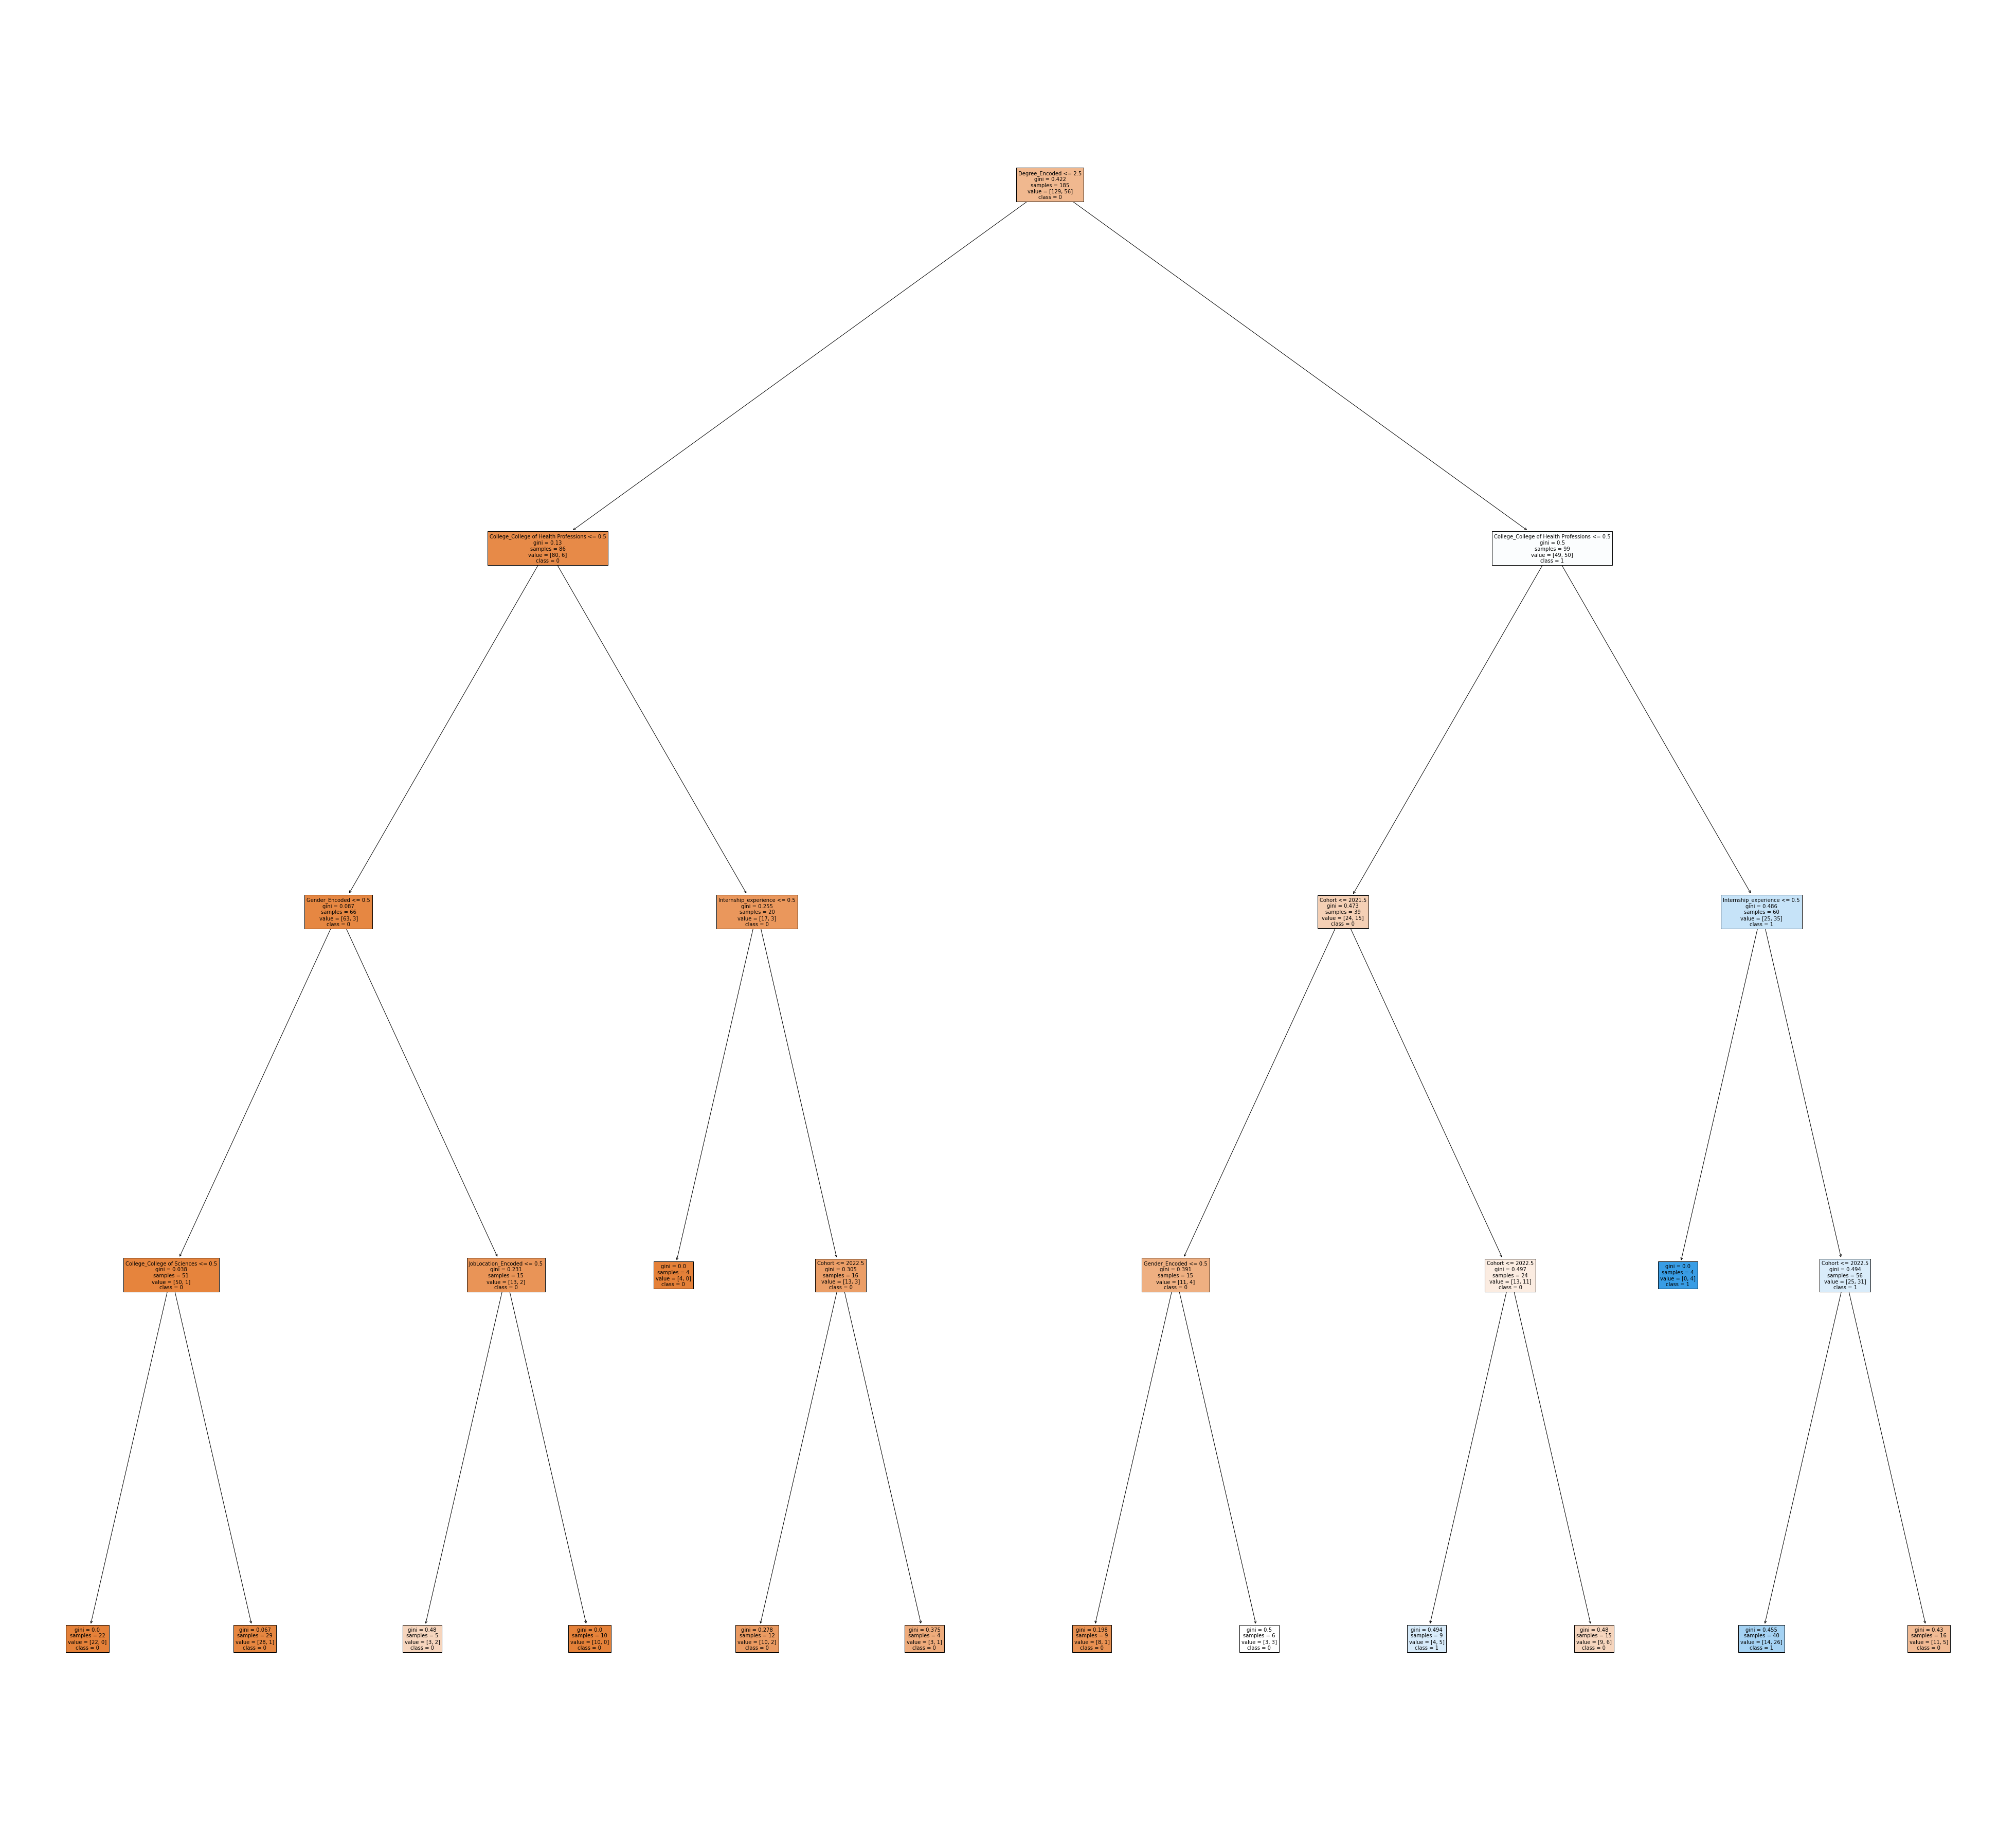

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Salary' is the column to predict
# Replace 'data' with the actual DataFrame variable name

# Prepare the data
X = data.drop('Salary', axis=1)
Y = data['Salary']
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the K-fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the Decision Tree Classifier directly
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=4, min_samples_split=6, random_state=42)

# Perform K-fold cross-validation
scores = cross_val_score(dt_classifier, X_train_val, Y_train_val, scoring='accuracy', cv=kf)

# Output the scores
for i, score in enumerate(scores, 1):
    print(f"Fold {i}: Accuracy = {score:.4f}")

# Print the average accuracy
print(f"\nDecision Tree Average Accuracy: {np.mean(scores):.4f}")

# Fit the model on the entire training and validation data to visualize the tree
dt_classifier.fit(X_train_val, Y_train_val)

# Visualize the tree
plt.figure(figsize=(70,65))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=np.unique(Y).astype(str), fontsize=10)
plt.show()


In [55]:


# Fit the model on the entire training+validation set
pipeline.fit(X_train_val, Y_train_val)

# Predict on the test set
Y_test_pred_dt = pipeline.predict(X_test_dt)

# Calculate and print the accuracy on the test set
test_accuracy = accuracy_score(Y_test_dt, Y_test_pred_dt)
print(f"Test Set Accuracy: {test_accuracy:.4f}")


Test Set Accuracy: 0.8298


## Random Forest Model - Using Cross Validation 

In [56]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = data.drop('Salary', axis=1)
Y = data['Salary']

# Step 1: Split the data into a training+validation set (80%) and a separate test set (20%)
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 2: Define the K-fold cross-validator for the training+validation set
kf_rf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the Random Forest model with specified hyperparameters
random_forest = RandomForestClassifier(n_estimators=100, min_samples_split=4, min_samples_leaf=9, max_depth=6, bootstrap=False, random_state=42)

# Perform K-fold cross-validation on the training+validation set and calculate accuracies
scores = cross_val_score(random_forest, X_train_val, Y_train_val, scoring='accuracy', cv=kf)

# Print the accuracy for each fold
for i, score in enumerate(scores, 1):
    print(f"Fold {i}: Accuracy = {score:.4f}")

# Print the average accuracy over all folds
print(f"\nAverage Accuracy on Training + Validation: {np.mean(scores):.4f}")

Fold 1: Accuracy = 0.6757
Fold 2: Accuracy = 0.7838
Fold 3: Accuracy = 0.7568
Fold 4: Accuracy = 0.6486
Fold 5: Accuracy = 0.7838

Average Accuracy on Training + Validation: 0.7297


## Calculating Performance Metrics for Random Forest Model

In [57]:
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, confusion_matrix

X = data.drop('Salary', axis=1)
Y = data['Salary']

# Split the data into a training+validation set (80%) and a separate test set (20%)
X_train_val, X_test_rf, Y_train_val, Y_test_rf = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the K-fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the Random Forest model with specified hyperparameters
random_forest = RandomForestClassifier(n_estimators=100, min_samples_split=4, min_samples_leaf=9, max_depth=6, bootstrap=False, random_state=42)

# Custom scorer for specificity
def specificity_score(y_true, y_pred):
    tn, fp, _, _ = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp) if (tn + fp) > 0 else 0

specificity_scorer = make_scorer(specificity_score)

# Define the scoring metrics, including the custom specificity scorer
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc',
    'specificity': specificity_scorer
}

# Perform K-fold cross-validation and calculate the specified metrics
scores = cross_validate(random_forest, X_train_val, Y_train_val, scoring=scoring, cv=kf, return_train_score=False)

# Print the metrics for each fold and the average
for metric in scoring.keys():
    metric_scores = scores[f'test_{metric}']
    for fold_index, score in enumerate(metric_scores, 1):
        print(f"Fold {fold_index}: {metric.capitalize()} = {score:.4f}")
    print(f"\nAverage {metric.capitalize()}: {np.mean(metric_scores):.4f}\n")


Fold 1: Accuracy = 0.6757
Fold 2: Accuracy = 0.7838
Fold 3: Accuracy = 0.7568
Fold 4: Accuracy = 0.6486
Fold 5: Accuracy = 0.7838

Average Accuracy: 0.7297

Fold 1: Precision = 0.5000
Fold 2: Precision = 0.6250
Fold 3: Precision = 0.5000
Fold 4: Precision = 0.7500
Fold 5: Precision = 0.6250

Average Precision: 0.6000

Fold 1: Recall = 0.3333
Fold 2: Recall = 0.5000
Fold 3: Recall = 0.7778
Fold 4: Recall = 0.2000
Fold 5: Recall = 0.5000

Average Recall: 0.4622

Fold 1: F1 = 0.4000
Fold 2: F1 = 0.5556
Fold 3: F1 = 0.6087
Fold 4: F1 = 0.3158
Fold 5: F1 = 0.5556

Average F1: 0.4871

Fold 1: Roc_auc = 0.7183
Fold 2: Roc_auc = 0.7481
Fold 3: Roc_auc = 0.7897
Fold 4: Roc_auc = 0.8470
Fold 5: Roc_auc = 0.8019

Average Roc_auc: 0.7810

Fold 1: Specificity = 0.8400
Fold 2: Specificity = 0.8889
Fold 3: Specificity = 0.7500
Fold 4: Specificity = 0.9545
Fold 5: Specificity = 0.8889

Average Specificity: 0.8645



In [58]:
['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'Specificity']
[0.73, 0.60, 0.46, 0.49, 0.78, 0.86]

[0.73, 0.6, 0.46, 0.49, 0.78, 0.86]

# Grid Search

In [59]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define your data X and Y here
X = data.drop('Salary', axis=1)
Y = data['Salary']

# Split the data into a training+validation set (80%) and a separate test set (20%)
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the K-fold cross-validator for the training+validation set
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the hyperparameter grid for the Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [9, None],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 9],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with the Random Forest model
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform GridSearchCV on the training+validation set
grid_search.fit(X_train_val, Y_train_val)

# Print the best parameters found
print(f"Best Parameters: {grid_search.best_params_}")

# Best model according to grid search
best_rf_model = grid_search.best_estimator_

# Optionally, evaluate the best model on the test set
best_rf_model.fit(X_train_val, Y_train_val)
Y_pred_test = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_pred_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'bootstrap': False, 'max_depth': 9, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 100}

Test Accuracy: 0.8085


## Confusion Matrix for Random Forest

In [60]:

from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


X = data.drop('Salary', axis=1)
Y = data['Salary']

# Split the data into a training+validation set (80%) and a separate test set (20%)
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the K-fold cross-validator for the training+validation set
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the Random Forest model with specified hyperparameters
random_forest = RandomForestClassifier(n_estimators=100, min_samples_split=4, min_samples_leaf=9, max_depth=6, bootstrap=False, random_state=42)

# Placeholder for confusion matrices
conf_matrices = []

for train_index, val_index in kf.split(X_train_val):
    # Split the data into training and validation for the current fold
    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    Y_train, Y_val = Y_train_val.iloc[train_index], Y_train_val.iloc[val_index]
    
    # Fit the model on the training data
    random_forest.fit(X_train, Y_train)
    
    # Predict on the validation data
    Y_pred = random_forest.predict(X_val)
    
    # Compute and store the confusion matrix for the current fold
    conf_matrix = confusion_matrix(Y_val, Y_pred)
    conf_matrices.append(conf_matrix)

# Now, conf_matrices contains the confusion matrix for each fold

for i, matrix in enumerate(conf_matrices, 1):
    print(f"Fold {i} Confusion Matrix:\n{matrix}\n")

# This operation assumes that the class labels are consistent across folds.
if conf_matrices:
    avg_conf_matrix = np.mean(conf_matrices, axis=0)
    print(f"Average Confusion Matrix:\n{avg_conf_matrix}")


Fold 1 Confusion Matrix:
[[21  4]
 [ 8  4]]

Fold 2 Confusion Matrix:
[[24  3]
 [ 5  5]]

Fold 3 Confusion Matrix:
[[21  7]
 [ 2  7]]

Fold 4 Confusion Matrix:
[[21  1]
 [12  3]]

Fold 5 Confusion Matrix:
[[24  3]
 [ 5  5]]

Average Confusion Matrix:
[[22.2  3.6]
 [ 6.4  4.8]]


## Forward selection based on Logistic Regression

In [61]:

from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline



X = data.drop('Salary', axis=1)
Y = data['Salary']
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the K-fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Combine all college columns into a single 'college_all' column
college_columns = [col for col in X.columns if col.startswith('College_')]
X['college_all'] = X[college_columns].sum(axis=1)
X = X.drop(college_columns, axis=1)

# Initialize an empty list to store selected features
selected_features = []

# Define a function to evaluate a set of features using cross-validation
def evaluate_features(features):
    # Create a pipeline that standardizes the data then applies logistic regression
    pipeline = make_pipeline(StandardScaler(), LogisticRegression(C=1, solver='lbfgs', random_state=42, max_iter=2000, class_weight=None))
    
    # Perform K-fold cross-validation and calculate accuracies
    scores = cross_val_score(pipeline, X[features], Y, scoring='accuracy', cv=kf)
    
    # Return the average accuracy over all folds
    return np.mean(scores)

# Perform forward selection
while len(selected_features) < len(X.columns):
    best_accuracy = -1
    best_feature = None
    
    # Iterate over each feature not yet selected
    for feature in X.columns:
        if feature not in selected_features:
            # Try adding the feature to the selected features
            new_features = selected_features + [feature]
            
            # Evaluate the set of features
            accuracy = evaluate_features(new_features)
            
            # Check if this set of features gives better accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_feature = feature
    
    selected_features.append(best_feature)
    print(f"Selected feature: {best_feature}, Accuracy: {best_accuracy:.4f}")

print("\nSelected Features:")
for feature in selected_features:
    print(feature)

print(f"\nAverage Accuracy with Selected Features: {best_accuracy:.4f}")


Selected feature: Cohort, Accuracy: 0.7156
Selected feature: Internship_experience, Accuracy: 0.7156
Selected feature: JobLocation_Encoded, Accuracy: 0.7156
Selected feature: Gender_Encoded, Accuracy: 0.7157
Selected feature: college_all, Accuracy: 0.7200
Selected feature: Country_of_Origin, Accuracy: 0.7200
Selected feature: Degree_Encoded, Accuracy: 0.7072

Selected Features:
Cohort
Internship_experience
JobLocation_Encoded
Gender_Encoded
college_all
Country_of_Origin
Degree_Encoded

Average Accuracy with Selected Features: 0.7072


# AUC Curve for the Three Models

# Plotting the Performance Metrics for All Models

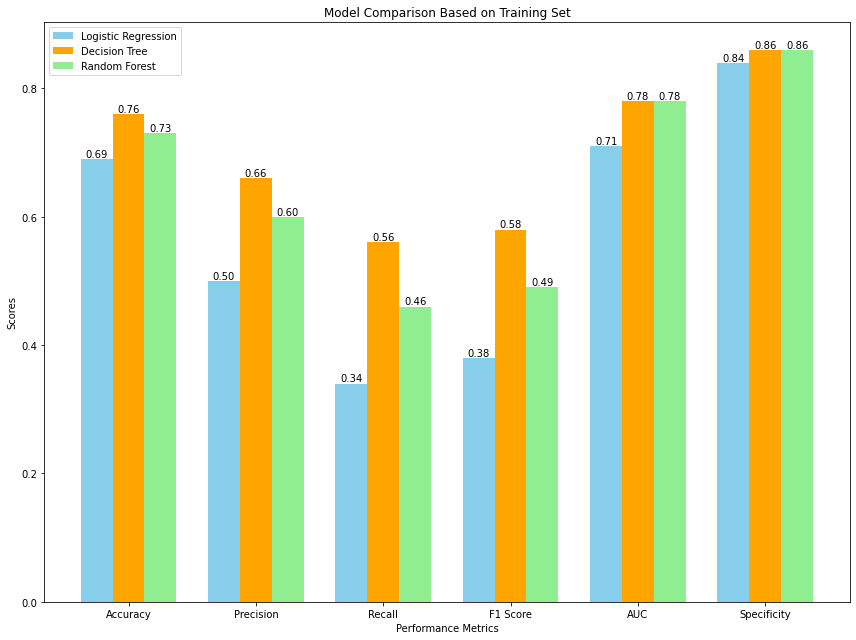

In [62]:

import matplotlib.pyplot as plt

# Updated metrics list to include Specificity and AUC
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'Specificity']

logistic_regression_scores = [0.69, 0.50, 0.34, 0.38, 0.71, 0.84]  # Updated Logistic Regression scores
decision_tree_scores = [0.76, 0.66, 0.56, 0.58, 0.78, 0.86]  # Updated Decision Tree scores
random_forest_scores = [0.73, 0.60, 0.46, 0.49, 0.78, 0.86]  # Updated Random Forest scores

x = np.arange(len(metrics))  
width = 0.25  

# Increased figure size
plt.figure(figsize=(12, 9))
bars1 = plt.bar(x - width, logistic_regression_scores, width=width, label='Logistic Regression', color='skyblue')
bars2 = plt.bar(x, decision_tree_scores, width=width, label='Decision Tree', color='orange')
bars3 = plt.bar(x + width, random_forest_scores, width=width, label='Random Forest', color='lightgreen')

# Function to add a label on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')

# Call the function for each set of bars
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

plt.xlabel('Performance Metrics')
plt.ylabel('Scores')
plt.title('Model Comparison Based on Training Set')
plt.xticks(x, metrics)
plt.legend()
plt.tight_layout()  
plt.show()


## Feature Importance Based on Random Forest 

C:\Users\Mahyar\AppData\Local\Temp\ipykernel_16836\1464395326.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append({'Feature': 'college', 'Importance': college_importance}, ignore_index=True)


                 Feature  Importance
3         Degree_Encoded    0.562445
6                college    0.326826
0                 Cohort    0.046848
4    JobLocation_Encoded    0.043251
5         Gender_Encoded    0.019994
1  Internship_experience    0.000635
2      Country_of_Origin    0.000000


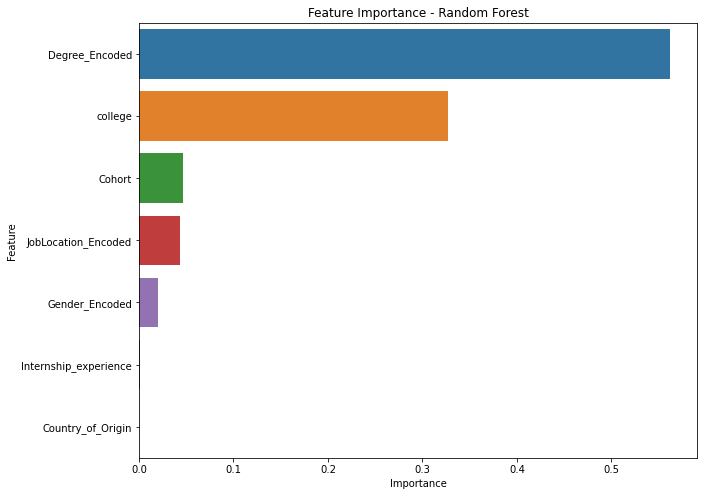

In [63]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

X = data.drop('Salary', axis=1)
Y = data['Salary']

# Split the data into a training+validation set (80%) and a separate test set (20%)
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Random Forest model with specified hyperparameters
random_forest = RandomForestClassifier(n_estimators=50, min_samples_split=4, min_samples_leaf=9, max_depth=9, bootstrap=False, random_state=42)

# Train the Random Forest model on the entire training+validation set
random_forest.fit(X_train_val, Y_train_val)

feature_importances = random_forest.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train_val.columns,
    'Importance': feature_importances
})

college_columns = [col for col in X_train_val.columns if col.startswith('College_')]
college_importance = features_df[features_df['Feature'].isin(college_columns)]['Importance'].sum()

features_df = features_df[~features_df['Feature'].isin(college_columns)]

features_df = features_df.append({'Feature': 'college', 'Importance': college_importance}, ignore_index=True)

features_df = features_df.sort_values(by='Importance', ascending=False)

print(features_df)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [64]:
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, confusion_matrix
# Fit the model on the entire training+validation set
random_forest.fit(X_train_val, Y_train_val)

# Predict on the test set
Y_test_pred = random_forest.predict(X_test)

# Calculate the confusion matrix for the test set
test_conf_matrix = confusion_matrix(Y_test, Y_test_pred)

# Display the confusion matrix for the test set
print("Confusion Matrix for the Test Set:\n", test_conf_matrix)


Confusion Matrix for the Test Set:
 [[34  3]
 [ 6  4]]


## Feature Importance Based on Decision Tree

In [65]:
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, confusion_matrix
import numpy as np
import pandas as pd  


X = data.drop('Salary', axis=1)
Y = data['Salary']
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Decision tree settings
dt_settings = {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 7, 'random_state': 132}

# Create a pipeline
pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier(**dt_settings))

# Custom scorer for specificity
def specificity_score(y_true, y_pred):
    tn, fp, _, _ = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp) if (tn + fp) > 0 else 0

specificity_scorer = make_scorer(specificity_score)

# Metrics setup
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc',
    'specificity': specificity_scorer
}

# Perform K-fold cross-validation
scores = cross_validate(pipeline, X_train_val, Y_train_val, scoring=scoring, cv=kf, return_train_score=False)

# Print the metrics
for metric in scoring.keys():
    metric_scores = scores[f'test_{metric}']
    print(f"Average {metric.capitalize()}: {np.mean(metric_scores):.4f}")

# Fit the model on the entire training set to compute feature importances
pipeline.fit(X_train_val, Y_train_val)

# Extract the decision tree model from the pipeline
dt_model = pipeline.named_steps['decisiontreeclassifier']

# Get feature importances
feature_importances = dt_model.feature_importances_

# Print feature importances
print("\nFeature Importances:")
for i, importance in enumerate(feature_importances, 1):
    print(f"Feature {i} ({X.columns[i-1]}): {importance:.4f}")


Average Accuracy: 0.7297
Average Precision: 0.5900
Average Recall: 0.5144
Average F1: 0.5125
Average Roc_auc: 0.7813
Average Specificity: 0.8428

Feature Importances:
Feature 1 (Cohort): 0.1719
Feature 2 (Internship_experience): 0.0697
Feature 3 (Country_of_Origin): 0.0000
Feature 4 (College_College of Business): 0.0246
Feature 5 (College_College of Education): 0.0000
Feature 6 (College_College of Health Professions): 0.0737
Feature 7 (College_College of Pharmacy): 0.0000
Feature 8 (College_College of Sciences): 0.0000
Feature 9 (Degree_Encoded): 0.5792
Feature 10 (JobLocation_Encoded): 0.0737
Feature 11 (Gender_Encoded): 0.0072


## Comparing Decsion Tree and Random Forest Importance Score(Just for comparing)

C:\Users\Mahyar\AppData\Local\Temp\ipykernel_6156\3706613213.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append([


                  Feature  Importance          Model
3          Degree_Encoded    0.562445  Random Forest
12                college    0.326826  Random Forest
0                  Cohort    0.046848  Random Forest
4     JobLocation_Encoded    0.043251  Random Forest
5          Gender_Encoded    0.019994  Random Forest
1   Internship_experience    0.000635  Random Forest
2       Country_of_Origin    0.000000  Random Forest
9          Degree_Encoded    0.793068  Decision Tree
13                college    0.100438  Decision Tree
6                  Cohort    0.092957  Decision Tree
11         Gender_Encoded    0.013537  Decision Tree
7   Internship_experience    0.000000  Decision Tree
8       Country_of_Origin    0.000000  Decision Tree
10    JobLocation_Encoded    0.000000  Decision Tree


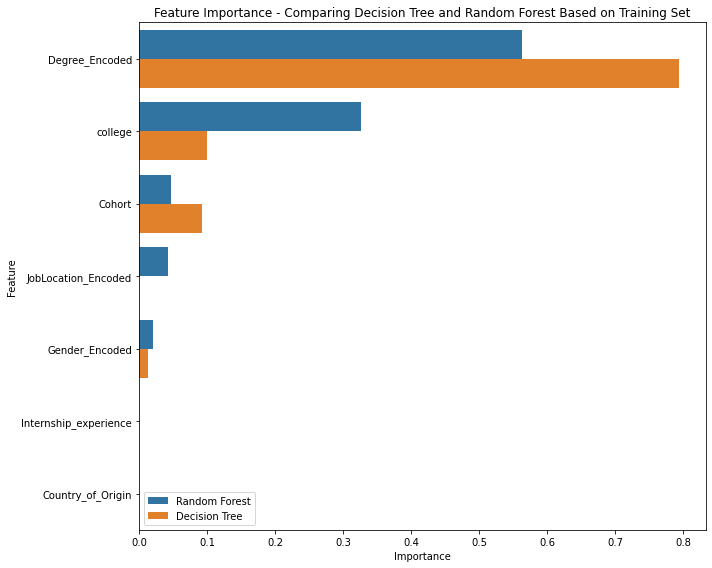

In [179]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


X = data.drop('Salary', axis=1)
Y = data['Salary']

# Split the data into a training+validation set (80%) and a separate test set (20%)
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the models
random_forest = RandomForestClassifier(n_estimators=50, min_samples_split=4, min_samples_leaf=9, max_depth=9, bootstrap=False, random_state=42)
decision_tree = DecisionTreeClassifier(max_depth=9, min_samples_split=4, min_samples_leaf=9, random_state=42)

# Train the models
random_forest.fit(X_train_val, Y_train_val)
decision_tree.fit(X_train_val, Y_train_val)

# Get feature importances
rf_feature_importances = random_forest.feature_importances_
dt_feature_importances = decision_tree.feature_importances_

# Create DataFrame for Random Forest feature importances
rf_features_df = pd.DataFrame({
    'Feature': X_train_val.columns,
    'Importance': rf_feature_importances,
    'Model': 'Random Forest'
})

# Create DataFrame for Decision Tree feature importances
dt_features_df = pd.DataFrame({
    'Feature': X_train_val.columns,
    'Importance': dt_feature_importances,
    'Model': 'Decision Tree'
})

# Combine the two DataFrames
features_df = pd.concat([rf_features_df, dt_features_df], axis=0)

# Aggregate college feature importances if needed
college_columns = [col for col in X_train_val.columns if col.startswith('College_')]
college_importance_rf = rf_features_df[rf_features_df['Feature'].isin(college_columns)]['Importance'].sum()
college_importance_dt = dt_features_df[dt_features_df['Feature'].isin(college_columns)]['Importance'].sum()

features_df = features_df[~features_df['Feature'].isin(college_columns)]

# Append aggregated college importances
features_df = features_df.append([
    {'Feature': 'college', 'Importance': college_importance_rf, 'Model': 'Random Forest'},
    {'Feature': 'college', 'Importance': college_importance_dt, 'Model': 'Decision Tree'}
], ignore_index=True)

# Sort and display
features_df = features_df.sort_values(by=['Model', 'Importance'], ascending=False)
print(features_df)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', hue='Model', data=features_df)
plt.title('Feature Importance - Comparing Decision Tree and Random Forest Based on Training Set')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend()
plt.tight_layout()
plt.show()


In [249]:
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import make_scorer, confusion_matrix

# Initialize the models
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()  # Decision Tree model

# Fit the Random Forest model on the entire training+validation set
random_forest.fit(X_train_val, Y_train_val)

# Fit the Decision Tree model on the entire training+validation set
decision_tree.fit(X_train_val, Y_train_val)  # Fit Decision Tree

# Predict on the test set using Random Forest
Y_test_pred_rf = random_forest.predict(X_test)

# Predict on the test set using Decision Tree
Y_test_pred_dt = decision_tree.predict(X_test)  # Predict with Decision Tree

# Calculate the confusion matrix for the test set - Random Forest
test_conf_matrix_rf = confusion_matrix(Y_test, Y_test_pred_rf)

# Calculate the confusion matrix for the test set - Decision Tree
test_conf_matrix_dt = confusion_matrix(Y_test, Y_test_pred_dt)  # Confusion matrix for Decision Tree

# Display the confusion matrix for the test set - Random Forest
print("Random Forest Confusion Matrix for the Test Set:\n", test_conf_matrix_rf)

# Display the confusion matrix for the test set - Decision Tree
print("Decision Tree Confusion Matrix for the Test Set:\n", test_conf_matrix_dt)  # Print Decision Tree Confusion Matrix


Random Forest Confusion Matrix for the Test Set:
 [[28  9]
 [ 3  7]]
Decision Tree Confusion Matrix for the Test Set:
 [[28  9]
 [ 5  5]]


## ROC Graph for 3 Models

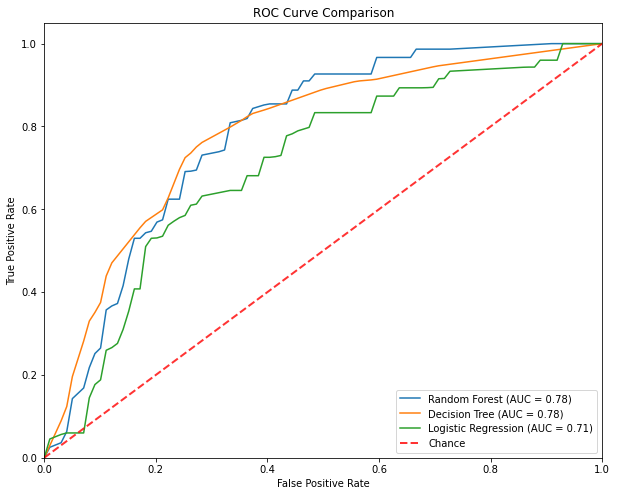

In [226]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

# Split the data initially to separate out the hold-out test set, which we won't use in this analysis
X_train_val, X_unused, Y_train_val, Y_unused = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define models including preprocessing where necessary
models = {
    "Random Forest": RandomForestClassifier(n_estimators=50, min_samples_split=4, min_samples_leaf=9, max_depth=9, bootstrap=False, random_state=42),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4, min_samples_split=7, random_state=42),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(C=1, solver='lbfgs', random_state=42, max_iter=2000))
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

tpr_dict = {}
fpr_dict = {}
auc_dict = {}

for name, model in models.items():
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_idx, test_idx in kf.split(X_train_val, Y_train_val):
        X_train, X_test = X_train_val.iloc[train_idx], X_train_val.iloc[test_idx]
        y_train, y_test = Y_train_val.iloc[train_idx], Y_train_val.iloc[test_idx]

        if name == "Logistic Regression":
            model.fit(X_train, y_train)
            y_score = model.decision_function(X_test)
        else:
            model.fit(X_train, y_train)
            y_score = model.predict_proba(X_test)[:, 1]

        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)

        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs.append(roc_auc)

    tpr_dict[name] = np.mean(tprs, axis=0)
    fpr_dict[name] = mean_fpr
    auc_dict[name] = np.mean(aucs)

# Plotting
plt.figure(figsize=(10, 8))
for name in models:
    plt.plot(fpr_dict[name], tpr_dict[name], label=f'{name} (AUC = {auc_dict[name]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()


In [144]:
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, confusion_matrix

X = data.drop('Salary', axis=1)
Y = data['Salary']

# Split the data into a training+validation set (80%) and a separate test set (20%)
X_train_val, X_test_rf, Y_train_val, Y_test_rf = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the K-fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the Random Forest model with specified hyperparameters
random_forest = RandomForestClassifier(n_estimators=50, min_samples_split=4, min_samples_leaf=9, max_depth=9, bootstrap=False, random_state=42)

# Custom scorer for specificity
def specificity_score(y_true, y_pred):
    tn, fp, _, _ = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp) if (tn + fp) > 0 else 0

specificity_scorer = make_scorer(specificity_score)

# Define the scoring metrics, including the custom specificity scorer
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc',
    'specificity': specificity_scorer
}

# Perform K-fold cross-validation and calculate the specified metrics
scores = cross_validate(random_forest, X_train_val, Y_train_val, scoring=scoring, cv=kf, return_train_score=False)

# Print the metrics for each fold and the average
for metric in scoring.keys():
    metric_scores = scores[f'test_{metric}']
    for fold_index, score in enumerate(metric_scores, 1):
        print(f"Fold {fold_index}: {metric.capitalize()} = {score:.4f}")
    print(f"\nAverage {metric.capitalize()}: {np.mean(metric_scores):.4f}\n")


Fold 1: Accuracy = 0.6757
Fold 2: Accuracy = 0.7838
Fold 3: Accuracy = 0.7568
Fold 4: Accuracy = 0.6486
Fold 5: Accuracy = 0.7297

Average Accuracy: 0.7189

Fold 1: Precision = 0.5000
Fold 2: Precision = 0.6250
Fold 3: Precision = 0.5000
Fold 4: Precision = 0.7500
Fold 5: Precision = 0.5000

Average Precision: 0.5750

Fold 1: Recall = 0.4167
Fold 2: Recall = 0.5000
Fold 3: Recall = 0.7778
Fold 4: Recall = 0.2000
Fold 5: Recall = 0.3000

Average Recall: 0.4389

Fold 1: F1 = 0.4545
Fold 2: F1 = 0.5556
Fold 3: F1 = 0.6087
Fold 4: F1 = 0.3158
Fold 5: F1 = 0.3750

Average F1: 0.4619

Fold 1: Roc_auc = 0.7383
Fold 2: Roc_auc = 0.7407
Fold 3: Roc_auc = 0.7778
Fold 4: Roc_auc = 0.8409
Fold 5: Roc_auc = 0.8019

Average Roc_auc: 0.7799

Fold 1: Specificity = 0.8000
Fold 2: Specificity = 0.8889
Fold 3: Specificity = 0.7500
Fold 4: Specificity = 0.9545
Fold 5: Specificity = 0.8889

Average Specificity: 0.8565



In [240]:
# Optional: Fit the model on the entire training+validation set and evaluate on the test set for a final performance check
decision_tree.fit(X_train_val, Y_train_val)
Y_test_pred_dt = decision_tree.predict(X_test_rf)
test_accuracy = accuracy_score(Y_test_dt, Y_test_pred_dt)
print(f" Decision Tree Test Set Accuracy: {test_accuracy:.4f}")
print(Y_test_pred_dt)

 Decision Tree Test Set Accuracy: 0.8298
[0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0]


In [241]:
# Optional: Fit the model on the entire training+validation set and evaluate on the test set for a final performance check
random_forest.fit(X_train_val, Y_train_val)
Y_test_pred_rf = random_forest.predict(X_test_rf)
test_accuracy = accuracy_score(Y_test_rf, Y_test_pred_rf)
print(f" Random Forest Test Set Accuracy: {test_accuracy:.4f}")
print(Y_test_pred_rf)

 Random Forest Test Set Accuracy: 0.7872
[0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0]


In [242]:

# Count where both models predict 1
both_predict_1 = sum((Y_test_pred_rf == 1) & (Y_test_pred_dt == 1))

# Count where both models predict 0
both_predict_0 = sum((Y_test_pred_rf == 0) & (Y_test_pred_dt == 0))

# Count where Random Forest predicts 1 and Decision Tree predicts 0
rf_1_dt_0 = sum((Y_test_pred_rf == 1) & (Y_test_pred_dt == 0))

# Count where Random Forest predicts 0 and Decision Tree predicts 1
rf_0_dt_1 = sum((Y_test_pred_rf == 0) & (Y_test_pred_dt == 1))

# Total predictions
total_predictions = len(Y_test_pred_rf)

# Calculate percentages
percent_both_1 = (both_predict_1 / total_predictions) * 100
percent_both_0 = (both_predict_0 / total_predictions) * 100
percent_rf_1_dt_0 = (rf_1_dt_0 / total_predictions) * 100
percent_rf_0_dt_1 = (rf_0_dt_1 / total_predictions) * 100


print(percent_both_1)
print(percent_both_0)
print(percent_rf_1_dt_0)
print(percent_rf_0_dt_1)

12.76595744680851
78.72340425531915
0.0
8.51063829787234


In [243]:
# Count where both models predict 1
both_predict_1 = sum((Y_test_pred_rf == 1) & (Y_test_pred_dt == 1))

# Count where both models predict 0
both_predict_0 = sum((Y_test_pred_rf == 0) & (Y_test_pred_dt == 0))

# Count where Random Forest predicts 1 and Decision Tree predicts 0
rf_1_dt_0 = sum((Y_test_pred_rf == 1) & (Y_test_pred_dt == 0))

# Count where Random Forest predicts 0 and Decision Tree predicts 1
rf_0_dt_1 = sum((Y_test_pred_rf == 0) & (Y_test_pred_dt == 1))

# Total predictions
total_predictions = len(Y_test_pred_rf)

# Calculate percentages and format them to two decimal places
percent_both_1 = (both_predict_1 / total_predictions) * 100
percent_both_0 = (both_predict_0 / total_predictions) * 100
percent_rf_1_dt_0 = (rf_1_dt_0 / total_predictions) * 100
percent_rf_0_dt_1 = (rf_0_dt_1 / total_predictions) * 100

# Printing the results formatted to two decimal places
print(f"{percent_both_1:.2f}")
print(f"{percent_both_0:.2f}")
print(f"{percent_rf_1_dt_0:.2f}")
print(f"{percent_rf_0_dt_1:.2f}")


12.77
78.72
0.00
8.51


In [248]:
data['Cohort'].value_counts()

2023    88
2021    81
2022    49
2020    14
Name: Cohort, dtype: int64

In [245]:
data

,Cohort,Salary,Internship_experience,Country_of_Origin,College_College of Business,College_College of Education,College_College of Health Professions,College_College of Pharmacy,College_College of Sciences,Degree_Encoded,JobLocation_Encoded,Gender_Encoded
0,2022,0,1,1,0.0,0.0,1.0,0.0,0.0,4,1,1
6,2022,1,1,1,0.0,0.0,1.0,0.0,0.0,3,1,0
7,2022,1,1,1,0.0,0.0,1.0,0.0,0.0,2,1,0
8,2022,0,1,1,1.0,0.0,0.0,0.0,0.0,2,1,0
11,2022,1,1,1,0.0,0.0,1.0,0.0,0.0,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
684,2023,0,1,0,0.0,0.0,1.0,0.0,0.0,3,0,1
685,2023,0,1,1,0.0,0.0,1.0,0.0,0.0,3,0,0
686,2023,1,1,1,0.0,0.0,1.0,0.0,0.0,3,0,0
687,2023,0,1,1,0.0,0.0,1.0,0.0,0.0,2,1,0


## Confusion Matrix for The Test set for Random Forest and Desion Tree(just for comparing)

In [72]:
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import make_scorer, confusion_matrix

# Initialize the models
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()  # Decision Tree model

# Fit the Random Forest model on the entire training+validation set
random_forest.fit(X_train_val, Y_train_val)

# Fit the Decision Tree model on the entire training+validation set
decision_tree.fit(X_train_val, Y_train_val)  # Fit Decision Tree

# Predict on the test set using Random Forest
Y_test_pred_rf = random_forest.predict(X_test)

# Predict on the test set using Decision Tree
Y_test_pred_dt = decision_tree.predict(X_test)  # Predict with Decision Tree

# Calculate the confusion matrix for the test set - Random Forest
test_conf_matrix_rf = confusion_matrix(Y_test, Y_test_pred_rf)

# Calculate the confusion matrix for the test set - Decision Tree
test_conf_matrix_dt = confusion_matrix(Y_test, Y_test_pred_dt)  # Confusion matrix for Decision Tree

# Display the confusion matrix for the test set - Random Forest
print("Random Forest Confusion Matrix for the Test Set:\n", test_conf_matrix_rf)

# Display the confusion matrix for the test set - Decision Tree
print("Decision Tree Confusion Matrix for the Test Set:\n", test_conf_matrix_dt)  # Print Decision Tree Confusion Matrix


Random Forest Confusion Matrix for the Test Set:
 [[29  8]
 [ 4  6]]
Decision Tree Confusion Matrix for the Test Set:
 [[28  9]
 [ 5  5]]


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you've already created X_train_val, X_test, Y_train_val, Y_test datasets with train_test_split as in your previous code

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier()  # Decision Tree model

# Fit the Decision Tree model on the entire training+validation set
decision_tree.fit(X_train_val, Y_train_val)  # Fit Decision Tree

# Predict on the test set using Decision Tree
Y_test_pred_dt = decision_tree.predict(X_test)  # Predict with Decision Tree

# Calculate the confusion matrix for the test set - Decision Tree
test_conf_matrix_dt = confusion_matrix(Y_test, Y_test_pred_dt)  # Confusion matrix for Decision Tree

# Display the confusion matrix for the test set - Decision Tree
print("Decision Tree Confusion Matrix for the Test Set:\n", test_conf_matrix_dt)  # Print Decision Tree Confusion Matrix

# To get the classification report, which includes metrics such as precision, recall, and F1-score:
classification_report_dt = classification_report(Y_test, Y_test_pred_dt)
print("Decision Tree Classification Report for the Test Set:\n", classification_report_dt)


Decision Tree Confusion Matrix for the Test Set:
 [[26 11]
 [ 5  5]]
Decision Tree Classification Report for the Test Set:
               precision    recall  f1-score   support

           0       0.84      0.70      0.76        37
           1       0.31      0.50      0.38        10

    accuracy                           0.66        47
   macro avg       0.58      0.60      0.57        47
weighted avg       0.73      0.66      0.68        47

